In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

10it [00:00, 99.51it/s]

17it [00:00, 86.44it/s]

33it [00:00, 99.80it/s]

49it [00:00, 110.32it/s]

64it [00:00, 118.04it/s]

75it [00:00, 111.60it/s]

91it [00:00, 121.04it/s]

103it [00:00, 114.96it/s]

115it [00:00, 106.44it/s]

126it [00:01, 103.49it/s]

139it [00:01, 109.12it/s]

155it [00:01, 120.06it/s]

169it [00:01, 124.98it/s]

182it [00:01, 114.15it/s]

198it [00:01, 124.83it/s]

214it [00:01, 133.14it/s]

230it [00:01, 140.00it/s]

245it [00:01, 134.98it/s]

259it [00:02, 125.78it/s]

275it [00:02, 134.18it/s]

291it [00:02, 140.65it/s]

308it [00:02, 145.98it/s]

323it [00:02, 130.61it/s]

339it [00:02, 137.05it/s]

355it [00:02, 141.65it/s]

371it [00:02, 145.48it/s]

387it [00:02, 147.91it/s]

402it [00:03, 148.30it/s]

418it [00:03, 148.88it/s]

433it [00:03, 147.40it/s]

448it [00:03, 147.79it/s]

463it [00:03, 148.06it/s]

478it [00:03, 147.71it/s]

494it [00:03, 149.61it/s]

510it [00:03, 151.57it/s]

526it [00:03, 150.65it/s]

542it [00:03, 150.81it/s]

558it [00:04, 148.63it/s]

574it [00:04, 149.82it/s]

589it [00:04, 142.80it/s]

604it [00:04, 136.69it/s]

620it [00:04, 141.50it/s]

637it [00:04, 146.20it/s]

654it [00:04, 150.61it/s]

670it [00:04, 152.83it/s]

687it [00:04, 154.92it/s]

703it [00:05, 156.30it/s]

719it [00:05, 146.55it/s]

734it [00:05, 129.99it/s]

748it [00:05, 126.57it/s]

764it [00:05, 134.62it/s]

780it [00:05, 139.74it/s]

795it [00:05, 136.83it/s]

810it [00:05, 140.14it/s]

825it [00:05, 142.72it/s]

841it [00:06, 147.19it/s]

857it [00:06, 149.61it/s]

873it [00:06, 151.95it/s]

889it [00:06, 153.36it/s]

905it [00:06, 153.49it/s]

921it [00:06, 154.35it/s]

937it [00:06, 150.92it/s]

953it [00:06, 149.48it/s]

969it [00:06, 151.95it/s]

985it [00:07, 131.03it/s]

999it [00:07, 125.01it/s]

1012it [00:07, 113.78it/s]

1024it [00:07, 109.12it/s]

1039it [00:07, 117.26it/s]

1054it [00:07, 125.45it/s]

1070it [00:07, 132.59it/s]

1086it [00:07, 138.56it/s]

1102it [00:07, 143.70it/s]

1117it [00:08, 134.98it/s]

1133it [00:08, 139.35it/s]

1149it [00:08, 144.59it/s]

1165it [00:08, 148.06it/s]

1181it [00:08, 151.38it/s]

1197it [00:08, 152.74it/s]

1213it [00:08, 153.77it/s]

1229it [00:08, 154.60it/s]

1245it [00:08, 154.49it/s]

1261it [00:09, 149.04it/s]

1277it [00:09, 151.21it/s]

1293it [00:09, 141.71it/s]

1309it [00:09, 145.71it/s]

1325it [00:09, 148.81it/s]

1340it [00:09, 148.16it/s]

1356it [00:09, 150.80it/s]

1372it [00:09, 150.37it/s]

1388it [00:09, 148.45it/s]

1404it [00:10, 150.85it/s]

1420it [00:10, 151.20it/s]

1436it [00:10, 151.70it/s]

1452it [00:10, 153.11it/s]

1468it [00:10, 155.05it/s]

1484it [00:10, 145.02it/s]

1500it [00:10, 147.78it/s]

1515it [00:10, 131.13it/s]

1531it [00:10, 136.67it/s]

1546it [00:11, 125.52it/s]

1562it [00:11, 132.35it/s]

1578it [00:11, 138.70it/s]

1594it [00:11, 142.14it/s]

1610it [00:11, 145.74it/s]

1626it [00:11, 147.90it/s]

1641it [00:11, 138.28it/s]

1656it [00:11, 131.19it/s]

1670it [00:11, 132.56it/s]

1686it [00:12, 139.26it/s]

1702it [00:12, 144.13it/s]

1719it [00:12, 149.10it/s]

1735it [00:12, 150.48it/s]

1751it [00:12, 124.05it/s]

1765it [00:12, 113.92it/s]

1780it [00:12, 121.90it/s]

1796it [00:12, 130.18it/s]

1812it [00:12, 136.22it/s]

1827it [00:13, 135.05it/s]

1843it [00:13, 141.20it/s]

1859it [00:13, 146.18it/s]

1876it [00:13, 150.30it/s]

1892it [00:13, 132.22it/s]

1906it [00:13, 129.13it/s]

1922it [00:13, 135.99it/s]

1938it [00:13, 140.58it/s]

1954it [00:13, 144.28it/s]

1969it [00:14, 126.22it/s]

1983it [00:14, 115.98it/s]

1996it [00:14, 111.39it/s]

2008it [00:14, 105.37it/s]

2023it [00:14, 114.10it/s]

2039it [00:14, 124.54it/s]

2056it [00:14, 133.08it/s]

2073it [00:14, 140.38it/s]

2089it [00:15, 144.09it/s]

2104it [00:15, 145.80it/s]

2120it [00:15, 147.20it/s]

2135it [00:15, 143.14it/s]

2150it [00:15, 144.65it/s]

2165it [00:15, 135.26it/s]

2181it [00:15, 140.98it/s]

2197it [00:15, 143.83it/s]

2213it [00:15, 145.96it/s]

2229it [00:16, 148.36it/s]

2244it [00:16, 141.61it/s]

2259it [00:16, 142.07it/s]

2275it [00:16, 146.42it/s]

2291it [00:16, 149.83it/s]

2308it [00:16, 152.66it/s]

2325it [00:16, 156.16it/s]

2341it [00:16, 156.22it/s]

2357it [00:16, 155.80it/s]

2373it [00:16, 151.01it/s]

2389it [00:17, 148.45it/s]

2404it [00:17, 141.93it/s]

2419it [00:17, 123.65it/s]

2432it [00:17, 120.71it/s]

2446it [00:17, 125.60it/s]

2459it [00:17, 109.61it/s]

2471it [00:17, 109.77it/s]

2487it [00:17, 119.67it/s]

2503it [00:18, 128.57it/s]

2517it [00:18, 123.35it/s]

2533it [00:18, 132.19it/s]

2547it [00:18, 132.62it/s]

2563it [00:18, 139.64it/s]

2579it [00:18, 144.36it/s]

2595it [00:18, 146.86it/s]

2610it [00:18, 141.95it/s]

2625it [00:18, 133.30it/s]

2640it [00:19, 135.99it/s]

2654it [00:19, 133.48it/s]

2669it [00:19, 135.59it/s]

2684it [00:19, 138.27it/s]

2700it [00:19, 143.83it/s]

2716it [00:19, 148.15it/s]

2733it [00:19, 151.92it/s]

2749it [00:19, 154.03it/s]

2766it [00:19, 155.47it/s]

2782it [00:19, 155.99it/s]

2798it [00:20, 153.00it/s]

2814it [00:20, 147.08it/s]

2829it [00:20, 116.90it/s]

2842it [00:20, 112.25it/s]

2854it [00:20, 100.36it/s]

2866it [00:20, 105.06it/s]

2882it [00:20, 116.52it/s]

2895it [00:20, 111.32it/s]

2908it [00:21, 115.25it/s]

2920it [00:21, 111.20it/s]

2933it [00:21, 113.63it/s]

2948it [00:21, 121.64it/s]

2964it [00:21, 130.35it/s]

2980it [00:21, 137.70it/s]

2997it [00:21, 143.82it/s]

3014it [00:21, 148.72it/s]

3030it [00:21, 150.84it/s]

3047it [00:22, 153.35it/s]

3064it [00:22, 155.94it/s]

3081it [00:22, 158.06it/s]

3097it [00:22, 157.91it/s]

3113it [00:22, 147.92it/s]

3128it [00:22, 146.17it/s]

3143it [00:22, 143.96it/s]

3158it [00:22, 143.23it/s]

3173it [00:22, 142.08it/s]

3190it [00:23, 147.45it/s]

3206it [00:23, 149.20it/s]

3222it [00:23, 151.59it/s]

3238it [00:23, 136.60it/s]

3253it [00:23, 139.65it/s]

3268it [00:23, 138.01it/s]

3284it [00:23, 143.30it/s]

3300it [00:23, 147.17it/s]

3316it [00:23, 150.39it/s]

3332it [00:23, 144.11it/s]

3347it [00:24, 143.64it/s]

3363it [00:24, 146.73it/s]

3380it [00:24, 151.20it/s]

3397it [00:24, 153.82it/s]

3414it [00:24, 155.99it/s]

3430it [00:24, 156.50it/s]

3447it [00:24, 158.08it/s]

3463it [00:24, 157.67it/s]

3480it [00:24, 159.48it/s]

3497it [00:25, 160.55it/s]

3514it [00:25, 146.63it/s]

3529it [00:25, 147.09it/s]

3544it [00:25, 126.61it/s]

3558it [00:25, 124.39it/s]

3573it [00:25, 129.91it/s]

3590it [00:25, 139.23it/s]

3607it [00:25, 146.29it/s]

3624it [00:25, 151.55it/s]

3641it [00:26, 154.82it/s]

3658it [00:26, 156.22it/s]

3675it [00:26, 158.76it/s]

3692it [00:26, 158.00it/s]

3708it [00:26, 134.94it/s]

3723it [00:26, 122.96it/s]

3737it [00:26, 127.21it/s]

3751it [00:26, 120.52it/s]

3768it [00:27, 131.24it/s]

3783it [00:27, 134.51it/s]

3799it [00:27, 140.08it/s]

3814it [00:27, 122.14it/s]

3827it [00:27, 112.98it/s]

3839it [00:27, 109.20it/s]

3853it [00:27, 115.39it/s]

3869it [00:27, 125.52it/s]

3885it [00:27, 133.50it/s]

3901it [00:28, 139.95it/s]

3917it [00:28, 145.20it/s]

3934it [00:28, 150.29it/s]

3950it [00:28, 151.98it/s]

3968it [00:28, 156.89it/s]

3985it [00:28, 158.94it/s]

4002it [00:28, 158.70it/s]

4018it [00:28, 147.02it/s]

4034it [00:28, 148.27it/s]

4049it [00:29, 130.64it/s]

4065it [00:29, 137.54it/s]

4081it [00:29, 142.73it/s]

4097it [00:29, 146.07it/s]

4113it [00:29, 149.42it/s]

4129it [00:29, 151.74it/s]

4145it [00:29, 152.37it/s]

4162it [00:29, 157.02it/s]

4179it [00:29, 157.92it/s]

4195it [00:29, 156.53it/s]

4211it [00:30, 133.97it/s]

4226it [00:30, 122.26it/s]

4239it [00:30, 115.25it/s]

4252it [00:30, 110.47it/s]

4264it [00:30, 105.08it/s]

4275it [00:30, 103.76it/s]

4292it [00:30, 116.15it/s]

4305it [00:31, 104.96it/s]

4317it [00:31, 101.52it/s]

4332it [00:31, 112.32it/s]

4348it [00:31, 122.70it/s]

4364it [00:31, 130.41it/s]

4381it [00:31, 138.06it/s]

4396it [00:31, 140.86it/s]

4412it [00:31, 145.66it/s]

4428it [00:31, 147.48it/s]

4445it [00:31, 151.34it/s]

4461it [00:32, 142.97it/s]

4478it [00:32, 148.23it/s]

4495it [00:32, 151.82it/s]

4512it [00:32, 155.40it/s]

4528it [00:32, 155.70it/s]

4544it [00:32, 156.07it/s]

4561it [00:32, 157.29it/s]

4577it [00:32, 137.36it/s]

4592it [00:33, 128.00it/s]

4608it [00:33, 134.11it/s]

4625it [00:33, 141.07it/s]

4642it [00:33, 147.98it/s]

4658it [00:33, 125.92it/s]

4672it [00:33, 123.87it/s]

4689it [00:33, 134.54it/s]

4706it [00:33, 141.71it/s]

4723it [00:33, 147.43it/s]

4736it [00:34, 139.18it/s]


0it [00:00, ?it/s]

16it [00:00, 157.17it/s]

Number of empty sat catalogs is 175


32it [00:00, 155.77it/s]

48it [00:00, 156.01it/s]

64it [00:00, 156.00it/s]

81it [00:00, 157.26it/s]

95it [00:00, 144.73it/s]

110it [00:00, 144.67it/s]

124it [00:00, 140.63it/s]

138it [00:00, 135.33it/s]

155it [00:01, 142.78it/s]

170it [00:01, 140.17it/s]

186it [00:01, 145.31it/s]

202it [00:01, 147.41it/s]

217it [00:01, 124.27it/s]

231it [00:01, 119.41it/s]

245it [00:01, 122.94it/s]

261it [00:01, 131.74it/s]

277it [00:01, 139.00it/s]

293it [00:02, 142.79it/s]

310it [00:02, 147.72it/s]

326it [00:02, 137.99it/s]

342it [00:02, 143.84it/s]

357it [00:02, 143.61it/s]

372it [00:02, 138.81it/s]

387it [00:02, 141.88it/s]

403it [00:02, 144.48it/s]

419it [00:02, 146.48it/s]

435it [00:03, 149.25it/s]

450it [00:03, 148.24it/s]

465it [00:03, 109.33it/s]

482it [00:03, 121.04it/s]

496it [00:03, 116.64it/s]

509it [00:03, 117.75it/s]

525it [00:03, 127.55it/s]

542it [00:03, 136.10it/s]

559it [00:04, 143.28it/s]

575it [00:04, 147.53it/s]

591it [00:04, 144.71it/s]

608it [00:04, 150.79it/s]

625it [00:04, 154.04it/s]

642it [00:04, 157.41it/s]

659it [00:04, 159.15it/s]

676it [00:04, 160.42it/s]

693it [00:04, 160.54it/s]

710it [00:04, 160.01it/s]

727it [00:05, 160.26it/s]

744it [00:05, 160.95it/s]

761it [00:05, 163.36it/s]

778it [00:05, 163.36it/s]

795it [00:05, 161.42it/s]

812it [00:05, 159.87it/s]

829it [00:05, 161.24it/s]

846it [00:05, 162.22it/s]

863it [00:05, 161.41it/s]

880it [00:06, 162.41it/s]

897it [00:06, 161.72it/s]

914it [00:06, 161.99it/s]

931it [00:06, 161.04it/s]

948it [00:06, 161.18it/s]

965it [00:06, 161.26it/s]

982it [00:06, 160.15it/s]

999it [00:06, 154.54it/s]

1015it [00:06, 144.21it/s]

1030it [00:07, 116.23it/s]

1043it [00:07, 100.65it/s]

1060it [00:07, 114.00it/s]

1077it [00:07, 125.36it/s]

1093it [00:07, 133.77it/s]

1108it [00:07, 130.87it/s]

1122it [00:07, 116.49it/s]

1135it [00:07, 110.70it/s]

1151it [00:08, 121.14it/s]

1166it [00:08, 127.08it/s]

1183it [00:08, 136.43it/s]

1200it [00:08, 142.77it/s]

1216it [00:08, 145.91it/s]

1232it [00:08, 149.71it/s]

1249it [00:08, 154.57it/s]

1266it [00:08, 158.47it/s]

1283it [00:08, 160.93it/s]

1300it [00:09, 163.45it/s]

1317it [00:09, 149.30it/s]

1333it [00:09, 142.44it/s]

1350it [00:09, 148.91it/s]

1366it [00:09, 145.55it/s]

1383it [00:09, 150.94it/s]

1400it [00:09, 154.62it/s]

1417it [00:09, 157.22it/s]

1433it [00:09, 156.88it/s]

1449it [00:10, 156.57it/s]

1465it [00:10, 156.38it/s]

1481it [00:10, 156.86it/s]

1497it [00:10, 155.28it/s]

1514it [00:10, 158.17it/s]

1531it [00:10, 159.97it/s]

1548it [00:10, 161.86it/s]

1565it [00:10, 162.44it/s]

1582it [00:10, 163.01it/s]

1599it [00:10, 162.90it/s]

1616it [00:11, 162.27it/s]

1633it [00:11, 162.07it/s]

1650it [00:11, 141.06it/s]

1666it [00:11, 145.70it/s]

1683it [00:11, 151.24it/s]

1699it [00:11, 152.74it/s]

1716it [00:11, 156.79it/s]

1732it [00:11, 154.87it/s]

1749it [00:11, 157.48it/s]

1765it [00:12, 145.61it/s]

1780it [00:12, 127.16it/s]

1794it [00:12, 128.87it/s]

1808it [00:12, 117.32it/s]

1821it [00:12, 118.85it/s]

1837it [00:12, 127.39it/s]

1854it [00:12, 136.40it/s]

1869it [00:12, 136.09it/s]

1886it [00:12, 144.70it/s]

1903it [00:13, 149.66it/s]

1919it [00:13, 133.38it/s]

1933it [00:13, 116.90it/s]

1949it [00:13, 126.50it/s]

1966it [00:13, 135.13it/s]

1981it [00:13, 124.36it/s]

1996it [00:13, 130.11it/s]

2013it [00:13, 138.31it/s]

2030it [00:14, 145.40it/s]

2047it [00:14, 150.56it/s]

2064it [00:14, 155.59it/s]

2081it [00:14, 159.33it/s]

2098it [00:14, 160.09it/s]

2115it [00:14, 161.14it/s]

2132it [00:14, 160.83it/s]

2149it [00:14, 163.04it/s]

2166it [00:14, 163.65it/s]

2183it [00:14, 157.50it/s]

2200it [00:15, 159.04it/s]

2216it [00:15, 148.83it/s]

2233it [00:15, 153.81it/s]

2251it [00:15, 158.68it/s]

2268it [00:15, 153.57it/s]

2284it [00:15, 152.74it/s]

2300it [00:15, 154.68it/s]

2316it [00:15, 151.31it/s]

2332it [00:16, 134.24it/s]

2349it [00:16, 138.04it/s]

2364it [00:16, 122.80it/s]

2379it [00:16, 127.79it/s]

2393it [00:16, 120.09it/s]

2406it [00:16, 122.23it/s]

2422it [00:16, 130.59it/s]

2437it [00:16, 134.95it/s]

2452it [00:16, 137.54it/s]

2469it [00:17, 145.23it/s]

2486it [00:17, 151.27it/s]

2504it [00:17, 156.92it/s]

2520it [00:17, 134.67it/s]

2536it [00:17, 139.29it/s]

2553it [00:17, 145.23it/s]

2570it [00:17, 150.61it/s]

2587it [00:17, 155.62it/s]

2604it [00:17, 157.47it/s]

2620it [00:18, 157.57it/s]

2637it [00:18, 159.75it/s]

2654it [00:18, 160.57it/s]

2671it [00:18, 161.27it/s]

2688it [00:18, 160.69it/s]

2705it [00:18, 142.77it/s]

2720it [00:18, 142.89it/s]

2735it [00:18, 137.31it/s]

2749it [00:18, 121.12it/s]

2765it [00:19, 129.65it/s]

2782it [00:19, 137.82it/s]

2797it [00:19, 125.13it/s]

2811it [00:19, 118.40it/s]

2825it [00:19, 123.43it/s]

2842it [00:19, 133.40it/s]

2859it [00:19, 142.33it/s]

2876it [00:19, 148.24it/s]

2892it [00:19, 147.88it/s]

2908it [00:20, 132.95it/s]

2922it [00:20, 130.41it/s]

2939it [00:20, 138.54it/s]

2956it [00:20, 145.54it/s]

2973it [00:20, 150.75it/s]

2990it [00:20, 155.23it/s]

3007it [00:20, 157.58it/s]

3024it [00:20, 158.89it/s]

3041it [00:20, 159.25it/s]

3058it [00:21, 160.29it/s]

3075it [00:21, 161.14it/s]

3092it [00:21, 162.48it/s]

3109it [00:21, 160.51it/s]

3126it [00:21, 159.09it/s]

3142it [00:21, 136.97it/s]

3159it [00:21, 144.47it/s]

3176it [00:21, 149.95it/s]

3193it [00:21, 153.45it/s]

3209it [00:22, 154.48it/s]

3225it [00:22, 135.70it/s]

3240it [00:22, 125.64it/s]

3256it [00:22, 133.14it/s]

3273it [00:22, 141.50it/s]

3291it [00:22, 148.80it/s]

3307it [00:22, 148.60it/s]

3323it [00:22, 151.34it/s]

3340it [00:22, 154.19it/s]

3356it [00:23, 155.63it/s]

3373it [00:23, 157.30it/s]

3390it [00:23, 159.60it/s]

3407it [00:23, 159.78it/s]

3424it [00:23, 159.64it/s]

3440it [00:23, 159.27it/s]

3456it [00:23, 150.52it/s]

3473it [00:23, 153.76it/s]

3490it [00:23, 155.67it/s]

3507it [00:24, 159.03it/s]

3523it [00:24, 153.51it/s]

3539it [00:24, 135.79it/s]

3554it [00:24, 126.20it/s]

3568it [00:24, 126.10it/s]

3585it [00:24, 135.74it/s]

3602it [00:24, 144.05it/s]

3617it [00:24, 123.63it/s]

3634it [00:25, 133.43it/s]

3649it [00:25, 125.34it/s]

3665it [00:25, 132.72it/s]

3682it [00:25, 140.80it/s]

3699it [00:25, 148.06it/s]

3716it [00:25, 154.02it/s]

3734it [00:25, 159.59it/s]

3751it [00:25, 162.34it/s]

3769it [00:25, 164.85it/s]

3786it [00:26, 132.46it/s]

3801it [00:26, 123.58it/s]

3816it [00:26, 130.27it/s]

3833it [00:26, 139.83it/s]

3850it [00:26, 147.67it/s]

3868it [00:26, 152.98it/s]

3885it [00:26, 157.04it/s]

3902it [00:26, 159.52it/s]

3919it [00:26, 153.00it/s]

3935it [00:27, 142.87it/s]

3951it [00:27, 146.68it/s]

3969it [00:27, 155.12it/s]

3987it [00:27, 160.80it/s]

4004it [00:27, 153.77it/s]

4020it [00:27, 146.75it/s]

4035it [00:27, 131.29it/s]

4053it [00:27, 142.02it/s]

4070it [00:27, 148.36it/s]

4088it [00:28, 155.10it/s]

4105it [00:28, 159.26it/s]

4122it [00:28, 162.05it/s]

4140it [00:28, 164.05it/s]

4159it [00:28, 167.89it/s]

4177it [00:28, 170.29it/s]

4195it [00:28, 166.43it/s]

4212it [00:28, 167.46it/s]

4230it [00:28, 168.32it/s]

4247it [00:29, 142.04it/s]

4262it [00:29, 123.44it/s]

4277it [00:29, 130.33it/s]

4295it [00:29, 141.65it/s]

4313it [00:29, 149.20it/s]

4331it [00:29, 156.07it/s]

4349it [00:29, 160.41it/s]

4366it [00:29, 135.06it/s]

4381it [00:29, 136.11it/s]

4397it [00:30, 142.03it/s]

4413it [00:30, 146.35it/s]

4429it [00:30, 146.53it/s]

4447it [00:30, 153.59it/s]

4464it [00:30, 156.81it/s]

4481it [00:30, 159.77it/s]

4499it [00:30, 162.84it/s]

4517it [00:30, 164.93it/s]

4534it [00:30, 165.87it/s]

4551it [00:31, 166.51it/s]

4568it [00:31, 157.13it/s]

4584it [00:31, 151.74it/s]

4601it [00:31, 155.73it/s]

4619it [00:31, 160.13it/s]

4636it [00:31, 162.49it/s]

4653it [00:31, 162.58it/s]

4671it [00:31, 165.75it/s]

4689it [00:31, 168.93it/s]

4706it [00:32, 134.30it/s]

4721it [00:32, 128.38it/s]

4736it [00:32, 146.66it/s]

Number of empty sat catalogs is 175


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

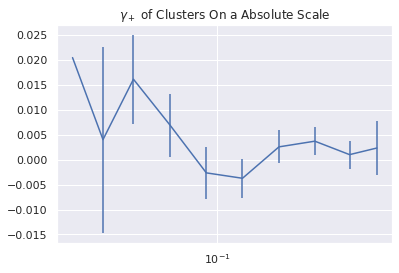

Aggregated xi:
[-2.0512e-02 -9.6745e-01 -1.2552e+01 -9.2751e+00  6.0561e+00  1.5018e+01
 -1.5189e+01 -2.8688e+01 -8.0342e+00 -4.6841e+00]
------------------------------------------------------------------------------
Aggregated meanlogr:
[-4.1936e+00 -9.0699e+02 -2.6353e+03 -3.9039e+03 -5.6254e+03 -7.9560e+03
 -8.7343e+03 -7.8417e+03 -4.3980e+03 -4.1125e+02]
------------------------------------------------------------------------------
Aggregated npairs:
[1.000e+00 2.390e+02 7.760e+02 1.339e+03 2.304e+03 4.043e+03 5.860e+03
 7.683e+03 7.778e+03 1.981e+03]
------------------------------------------------------------------------------
Mean xi:
[-0.0205 -0.004  -0.0162 -0.0069  0.0026  0.0037 -0.0026 -0.0037 -0.001
 -0.0024]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.1936 -3.7949 -3.396  -2.9155 -2.4416 -1.9678 -1.4905 -1.0207 -0.5654
 -0.2076]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

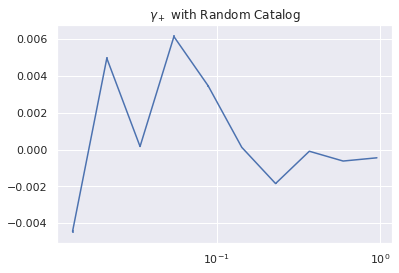

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 6.4598e-05 -7.2041e-05 -2.4146e-06 -8.9143e-05 -5.0345e-05 -1.7618e-06
  2.6826e-05  1.3348e-06  9.0593e-06  6.5046e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

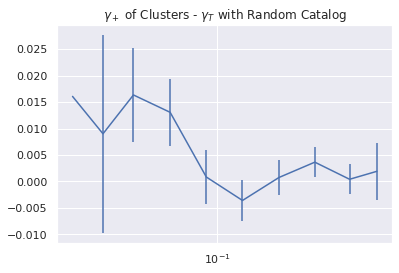

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

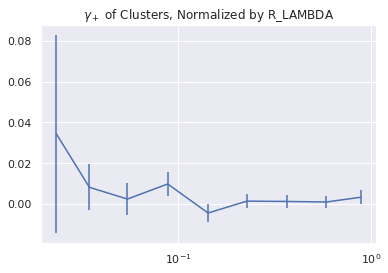

Aggregated xi:
[  0.      -1.4482  -4.4347  -2.6319 -17.6837  13.1299  -7.7366  -9.8146
  -9.6346 -18.0819]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -157.7881 -1794.9566 -2968.7278 -4317.5704 -6032.252
 -7311.345  -7010.9465 -4454.0303  -646.4456]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   42.  534. 1021. 1779. 3101. 4937. 6981. 8377. 5232.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0345 -0.0083 -0.0026 -0.0099  0.0042 -0.0016 -0.0014 -0.0012
 -0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7569 -3.3613 -2.9077 -2.427  -1.9453 -1.4809 -1.0043 -0.5317
 -0.1236]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)